In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import matplotlib.pyplot as plt
%matplotlib inline

seed = 1142

In [3]:
df=pd.read_csv("data/diabetes.csv")
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop("class", axis = 1)
y = df["class"]

In [7]:
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(768, 8)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=seed)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((576, 8), (576,), (192, 8), (192,))

In [10]:
num_folds=10
kfold=KFold(n_splits=num_folds,random_state=seed)

kfold=KFold(n_splits=num_folds,random_state=seed)
model=LogisticRegression()
result=cross_val_score(model,X,y,cv=kfold)
print("Logistic regression",result.mean())

Logistic regression 0.7799555707450445


In [11]:
model=LinearDiscriminantAnalysis()
result=cross_val_score(model,X,y,cv=kfold)
print("LDA",result.mean())

LDA 0.773462064251538


In [12]:
model=KNeighborsClassifier()
result=cross_val_score(model,X,y,cv=kfold)
print("KNN",result.mean())

KNN 0.7421394395078604


In [13]:
model=GaussianNB()
result=cross_val_score(model,X,y,cv=kfold)
print("NB",result.mean())

NB 0.7551777170198223


In [14]:
model=DecisionTreeClassifier()
result=cross_val_score(model,X,y,cv=kfold)
print("DT",result.mean())

DT 0.6887218045112782


In [15]:
model=SVC()
result=cross_val_score(model,X,y,cv=kfold)
print("SVM",result.mean())

SVM 0.7642857142857142


In [17]:
model=LinearRegression()

scoring='neg_mean_squared_error'
result=cross_val_score(model,X,y,scoring=scoring,cv=num_folds)
print("Linear Regression",result.mean())

Linear Regression -0.16281250654356544


In [19]:
model=Lasso()

scoring='neg_mean_squared_error'
result=cross_val_score(model,X,y,scoring=scoring,cv=num_folds)
print("Lasso",result.mean())

Lasso -0.22841470337309405


In [22]:
model=ElasticNet()

scoring='neg_mean_squared_error'
result=cross_val_score(model,X,y,scoring=scoring,cv=num_folds)
print("ElasticNet",result.mean())

ElasticNet -0.22841470337309405


In [24]:
model=KNeighborsRegressor()

scoring='neg_mean_squared_error'
result=cross_val_score(model,X,y,scoring=scoring,cv=num_folds)
print("KNN",result.mean())

KNN -0.17867464114832537


In [25]:
model=DecisionTreeRegressor()

scoring='neg_mean_squared_error'
result=cross_val_score(model,X,y,scoring=scoring,cv=num_folds)
print("DT",result.mean())

DT -0.3177375256322625


In [26]:
models={}
models['LR']=LogisticRegression()
models['LDA']=LinearDiscriminantAnalysis()
models['KNN']=KNeighborsClassifier()
models['CART']=DecisionTreeClassifier()
models['SVM']=SVC()
models['NB']=GaussianNB()

results=[]
for name in models:
    result=cross_val_score(models[name],X,y,cv=kfold)
    results.append(result)
    msg='%s:%.3f(%.3f)'%(name,result.mean(),result.std())
    print(msg)

LR:0.780(0.050)
LDA:0.773(0.052)
KNN:0.742(0.071)
CART:0.698(0.070)
SVM:0.764(0.057)
NB:0.755(0.043)


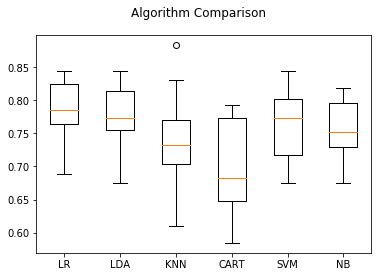

In [27]:
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()